In [69]:
import pandas as pd
import numpy as np
import similarity as sim
import naive_recommender as nav
import utils as ut
from typing import List,Dict
import argparse
import time
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

COLORS = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a']

def theta_jaccard_experiment():
    theta_values = [1, 3, 6, 9, 12]

    with open("theta_experiment.json", "r") as f:
        theta_results = json.load(f)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    nbins = 10
    
    for i, (theta, similarities) in enumerate(zip(theta_values, theta_results)):
        histogram, bins = np.histogram(similarities, bins=nbins)
        ax.bar(bins[0:nbins], histogram, zs=theta, zdir="y", color=COLORS[i], alpha=0.85, width=float(1/nbins))
        ax.set(xlabel='Jaccard Similarity', ylabel='Theta Values', zlabel='Frequency', title="Jaccard Similarity Distribution for Different Theta Values")
        
    plt.show()

def phi_jaccard_experiment():
    phi_values = [1, 4, 8, 12, 16]

    with open("phi_experiment.json", "r") as f:
        phi_results = json.load(f)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    nbins = 10

    for i, (phi, similarities) in enumerate(zip(phi_values, phi_results)):
        histogram, bins = np.histogram(similarities, bins=nbins)
        ax.bar(bins[0:nbins], histogram, zs=phi, zdir="y", color=COLORS[i], alpha=0.85, width=float(1/nbins))
        ax.set(xlabel='Jaccard Similarity', zlabel='Frequency', ylabel='Phi Values', title="Jaccard Similarity Distribution for Different Phi Values")

    plt.show()

def mu_jaccard_experiment():
    mu_values = [2,4,6,8,10]

    with open("mu_experiment.json", "r") as f:
        mu_results = json.load(f)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    nbins = 10

    for i, (mu, similarities) in enumerate(zip(mu_values, mu_results)):
        histogram, bins = np.histogram(similarities, bins=nbins)
        ax.bar(bins[0:nbins], histogram, zs=mu, zdir="y", color=COLORS[i], alpha=0.85, width=float(1/nbins))
        ax.set(xlabel='Jaccard Similarity', zlabel='Frequency', ylabel='Mu Values', title="Jaccard Similarity Distribution for Different Mu Values")

    plt.show()

#computes the jaccard similarity for the top_n
def genre_jaccard_similarity(dict1: Dict[str, int], dict2: Dict[str,int], theta: int) -> float:
    top_genres_dict1 = set(list(dict1.keys())[:theta])
    top_genres_dict2 = set(list(dict2.keys())[:theta])

    intersection_size = float(len(top_genres_dict1.intersection(top_genres_dict2)))
    union_size = float(len(top_genres_dict1.union(top_genres_dict2)))
    jaccard_similarity = intersection_size / union_size

    return jaccard_similarity


#Stores these similarities in a json to avoid recomputation
def get_jaccard_recommendation_similarity(range_of_users: int, matrix: pd.DataFrame, dataset, genre_matrix: pd.DataFrame,  mu: int,  phi: int, theta: int) -> None:
    similarities = []

    for user in range(1,range_of_users):
        most_watched_genres = get_user_most_watched_genres(user_idx=user, ratings=matrix, movies=dataset["movies.csv"], genre_matrix=genre_matrix)
        recommendation, neighbors = user_based_recommender(target_user_idx=user, matrix=matrix, phi=phi)
        movies, genres = get_genre_freq_movie_info_and_print_it_out(recommendations=recommendation, dataset=dataset, mu=mu, print_info=False)
        
        similarity = genre_jaccard_similarity(most_watched_genres, genres, theta)
        similarities.append(similarity)
        
    with open("jaccard_similarities.json", "w") as f:
        json.dump(similarities, f)
        
#instead of storing it returns
def get_jaccard_similarity(range_of_users: int, matrix: pd.DataFrame, dataset, genre_matrix: pd.DataFrame,  mu: int,  phi: int, theta: int) -> None:
    similarities = []

    for user in range(1,range_of_users):
        most_watched_genres = get_user_most_watched_genres(user_idx=user, ratings=matrix, movies=dataset["movies.csv"], genre_matrix=genre_matrix)
        recommendation, neighbors = user_based_recommender(target_user_idx=user, matrix=matrix, phi=phi)
        movies, genres = get_genre_freq_movie_info_and_print_it_out(recommendations=recommendation, dataset=dataset, mu=mu, print_info=False)
        
        similarity = genre_jaccard_similarity(most_watched_genres, genres, theta)
        similarities.append(similarity)
    return similarities

def compute_mu_results(range_of_users: int, matrix: pd.DataFrame, dataset, genre_matrix: pd.DataFrame,  phi: int, theta: int) -> None:
    mu_values = [2,4,6,8,10]
    
    all_results = []

    for value in mu_values:
        result = get_jaccard_similarity(
            range_of_users=range_of_users,matrix=matrix,dataset=dataset,
            genre_matrix=genre_matrix, mu=value, phi=phi,theta=theta)
        
        all_results.append(result)
        
    with open("mu_experiment.json", "w") as f:
        json.dump(all_results, f)
        
def compute_phi_results(range_of_users: int, matrix: pd.DataFrame, dataset, genre_matrix: pd.DataFrame, mu:int, theta: int) -> None:
    phi_values = [1, 4, 8, 12, 16]

    
    all_results = []

    for value in phi_values:
        result = get_jaccard_similarity(
            range_of_users=range_of_users,matrix=matrix,dataset=dataset,
            genre_matrix=genre_matrix, mu=mu, phi=value,theta=theta)
        
        all_results.append(result)
        
    with open("phi_experiment.json", "w") as f:
        json.dump(all_results, f)
        
def compute_theta_results(range_of_users: int, matrix: pd.DataFrame, dataset, genre_matrix: pd.DataFrame, mu:int, phi: int) -> None:
    theta_values = [1, 3, 6, 9, 12]

    
    all_results = []

    for value in theta_values:
        result = get_jaccard_similarity(
            range_of_users=range_of_users,matrix=matrix,dataset=dataset,
            genre_matrix=genre_matrix, mu=mu, phi=phi,theta=value)
        
        all_results.append(result)
        
    with open("theta_experiment.json", "w") as f:
        json.dump(all_results, f)
        
        
        
def plot_jaccard_similarity():
    with open("jaccard_similarities.json", "r") as f:
        similarities = json.load(f)
        
        # Plot the Jaccard Similarities with improved styling
        plt.figure(figsize=(10, 6))
        plt.hist(similarities, bins=10, edgecolor='black', color='#3498db', rwidth=0.8)
        
        plt.title('Jaccard Similarity for Recommendation Genres vs Most Watched Genres of each user', fontsize=16, fontweight='bold')
        plt.xlabel('Jaccard Similarity', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        
        plt.grid(axis='y', alpha=0.75)
        
        avg_similarity = sum(similarities) / len(similarities)
        plt.axhline(y=avg_similarity, color='r', linestyle='--', label=f'Average Similarity: {avg_similarity:.2f}')
        
        plt.legend()
        
        plt.show()


def get_user_most_watched_genres(user_idx: int, ratings: pd.DataFrame, movies: pd.DataFrame, genre_matrix: pd.DataFrame) -> Dict[str, int]:
    genres_recommendation = {}
    
    movies_watched = (ratings.loc[user_idx])
    movies_watched = movies_watched[movies_watched != 0]

    for movie_id, rating in movies_watched.items():
        # Get the genres for the current movie
        movie_genres = genre_matrix.loc[movie_id]
        
        # Iterate through the genres and update the frequency dictionary
        for genre, value in movie_genres.items():
            if value == 1:
                genres_recommendation[genre] = genres_recommendation.get(genre, 0) + 1

    return dict(sorted(genres_recommendation.items(), key=lambda item: item[1], reverse=True))
    
    
    
    
    

def get_genre_freq_movie_info_and_print_it_out(recommendations: List[int], dataset: any, mu: int, print_info: bool) -> (List[str], Dict[str,int]):
    genres_recommendated = {} 
    movies_titles = {}

    for recomendation in recommendations[:mu]:
        rec_movie = dataset["movies.csv"][dataset["movies.csv"]["movieId"]  == recomendation]
        
        #Print information
        if print_info:
            print(rec_movie)
            print (" Recomendation :Movie:{} (Genre: {})".format(rec_movie["title"].values[0], rec_movie["genres"].values[0]))
        
        #Store values
        movies_titles[recomendation] = rec_movie["title"].values[0]
        
        for genre in rec_movie["genres"].str.get_dummies().astype(str):
            
                genres_recommendated[genre] = genres_recommendated.get(genre, 0) + 1
        
    return movies_titles, dict(sorted(genres_recommendated.items(),key=lambda item: item[1], reverse=True))
        

def generate_m(movies_idx: pd.Series, users: pd.Series, ratings: pd.DataFrame) -> pd.DataFrame:
    filtered_ratings = ratings[ (ratings["movieId"].isin(movies_idx)) & (ratings["userId"].isin(users))]
    user_rating_matrix = filtered_ratings.pivot(index="userId", columns="movieId", values="rating")
    user_rating_matrix = user_rating_matrix.fillna(0)
    
    return user_rating_matrix
    
    
def user_based_recommender(target_user_idx: int, matrix: pd.DataFrame, phi: int) -> (List[int], List[int]):
    
    
    target_user_ratings = matrix.loc[target_user_idx]    
    other_users = matrix.drop(target_user_idx)
    target_user_avg_rating = (target_user_ratings.mask(target_user_ratings == 0)).mean()
        
    similarities = other_users.apply(lambda row: sim.compute_correlation_similarity(target_user_ratings[target_user_ratings != 0], row[row!=0]), axis=1).sort_values(ascending=False)
    neighbors = similarities.nlargest(phi)
    
    unrated_movies_by_target = target_user_ratings[target_user_ratings == 0].index
    
    recommendations = {}
    #for each movie we are going to apply the interest formula pred(a,s) = a_avg + sum(sim(a,b) - avg b ) / sum(sim(a,b))
    for movie in unrated_movies_by_target:
        sum1 = 0
        sum2 = 0
        for user, similarity in neighbors.items():
            user_ratings = other_users.loc[user]
            #If the user has seen the movie then its included on the computation
            if user_ratings[movie] != 0:
                sum1 += similarity * (user_ratings[movie] - user_ratings[user_ratings != 0].mean())
                sum2 += similarity 
                
        any_neighbor_seen_movie = sum2 != 0
        if any_neighbor_seen_movie: 
            #interest formula
            recommendations[movie] = target_user_avg_rating + sum1/sum2
                            
    sorted_recommendations = list(dict(sorted(recommendations.items(), key=lambda item: item[1], reverse=True)).keys())    
    return sorted_recommendations, neighbors    



if __name__ == "__main__":
    

    phi = 5
    mu = 5
    target_user_idx = 123
    theta = 5
        
    # Load the dataset, the genre matrix and the ratings data
    path_to_ml_latest_small = "../LAB_DATABASE/ml_latest_small/"
    dataset = ut.load_dataset_from_source(path_to_ml_latest_small)
    matrixmpa_genres = ut.matrix_genres(dataset["movies.csv"])

    # Ratings data
    val_movies = mu
    ratings_train, ratings_val = ut.split_users(dataset["ratings.csv"], val_movies)
    
    movies_idx = dataset["movies.csv"]["movieId"]
    users_idy = list(set(ratings_train["userId"].values))
    
    #GENERATE A MOVIE REVIEW MATRIX    
    m_train = generate_m(movies_idx, users_idy, ratings_train)
    m_validation = generate_m(movies_idx, users_idy, ratings_val)
    users = len(m_train)
    
    """
    get_jaccard_recommendation_similarity(
        range_of_users=len(m_train),
        matrix=m_train,
        dataset=dataset,
        genre_matrix=matrixmpa_genres,
        mu=mu,
        phi=phi,
        theta=theta
    )
    
    

    plot_jaccard_similarity()
    
    """
    
    """
    
    most_watched_genres = get_user_most_watched_genres(target_user_idx, ratings=m_train, movies=dataset["movies.csv"], genre_matrix=matrixmpa_genres)
    
    print(most_watched_genres)
            
    #GET A RECOMENDATION    
    recommendations, neighbors = user_based_recommender(target_user_idx, m_train, phi)
    print(neighbors)
     
    movies, genres = get_genre_freq_movie_info_and_print_it_out(
        recommendations=recommendations,
        dataset=dataset, mu=mu, print_info=True
    )   
    print(genres)
    print(movies)

    
    # Validation  
    
    #print(ratings_val)
    validation_movies = (ratings_val[ratings_val["userId"] == target_user_idx])
    validation_movies = validation_movies[validation_movies["rating"] != 0]
    #print(validation_movies.join(dataset["movies.csv"], on="movieId", how="left", lsuffix="lol", rsuffix="juan"))
    #print(most_watched_genres)
    """
    
    
    """
    compute_theta_results(range_of_users=users, matrix=m_train, dataset=dataset, genre_matrix=matrixmpa_genres, mu=mu, phi=phi)  
    compute_phi_results(range_of_users=users, matrix=m_train, dataset=dataset, genre_matrix=matrixmpa_genres, mu=mu, theta=theta)  
    compute_mu_results(range_of_users=users, matrix=m_train, dataset=dataset, genre_matrix=matrixmpa_genres, theta=theta, phi=phi)  
    """
    
        
    
    
    
     
    










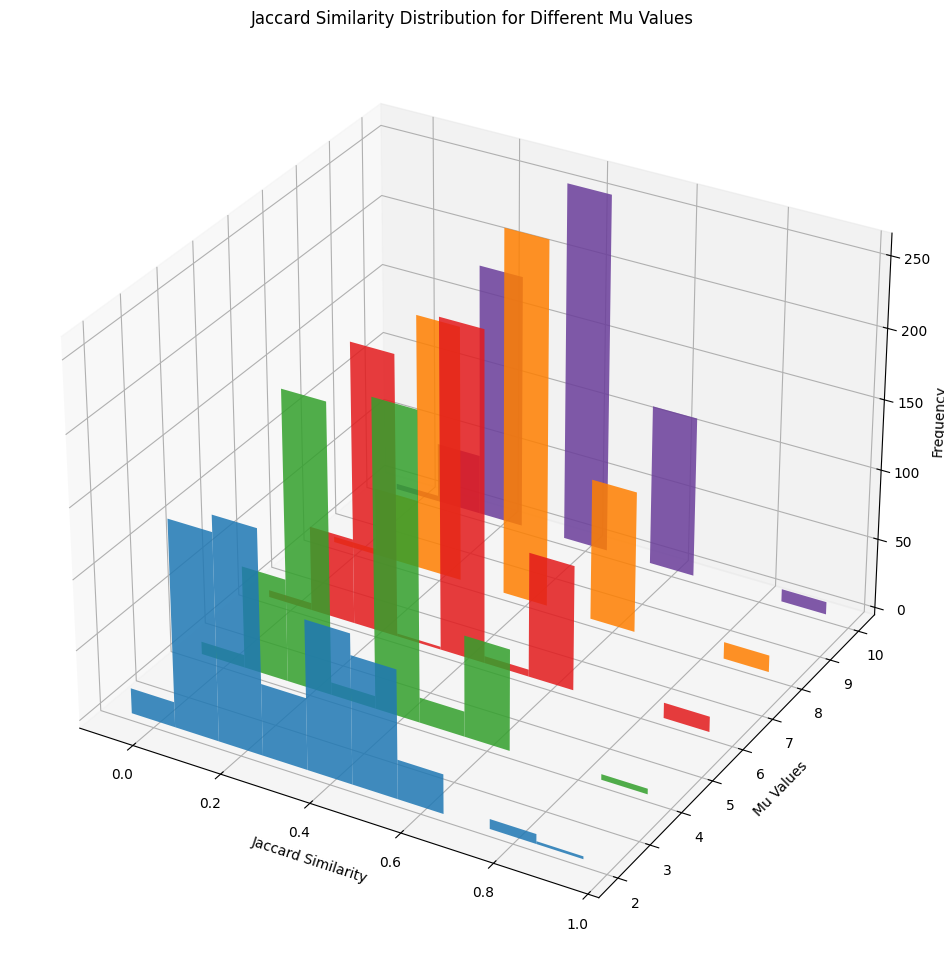

In [70]:
mu_jaccard_experiment()


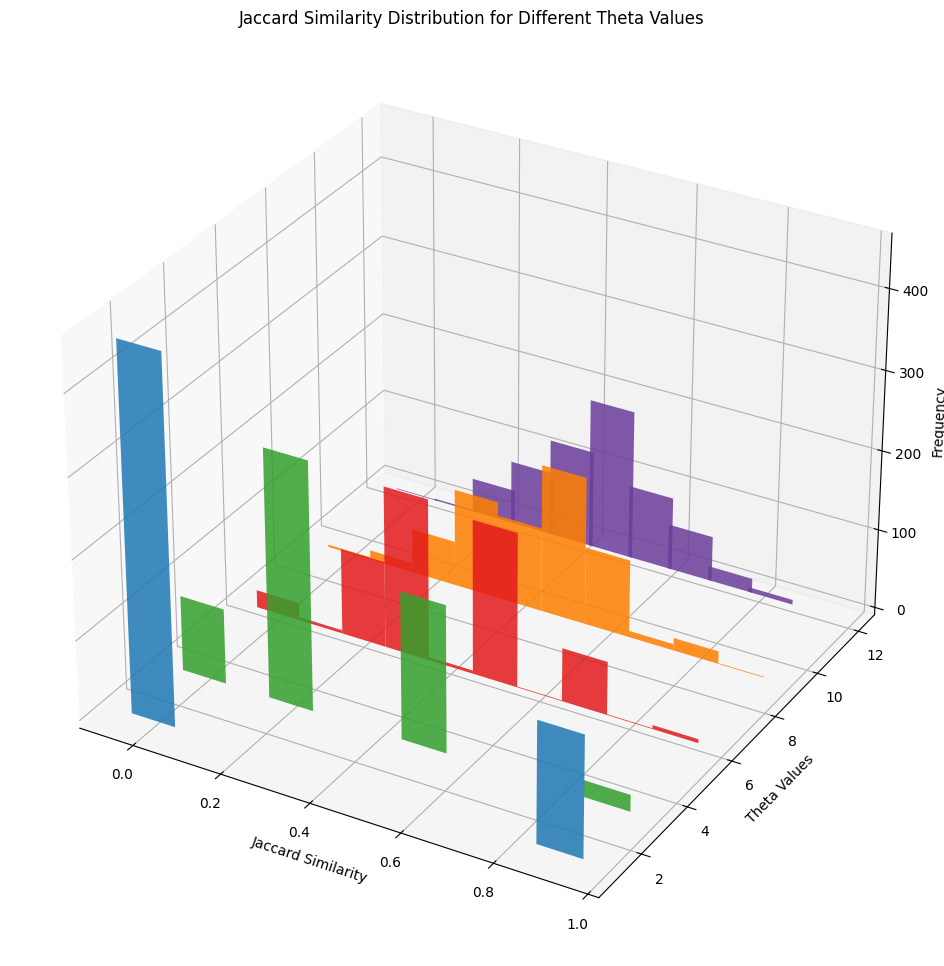

In [71]:
theta_jaccard_experiment()

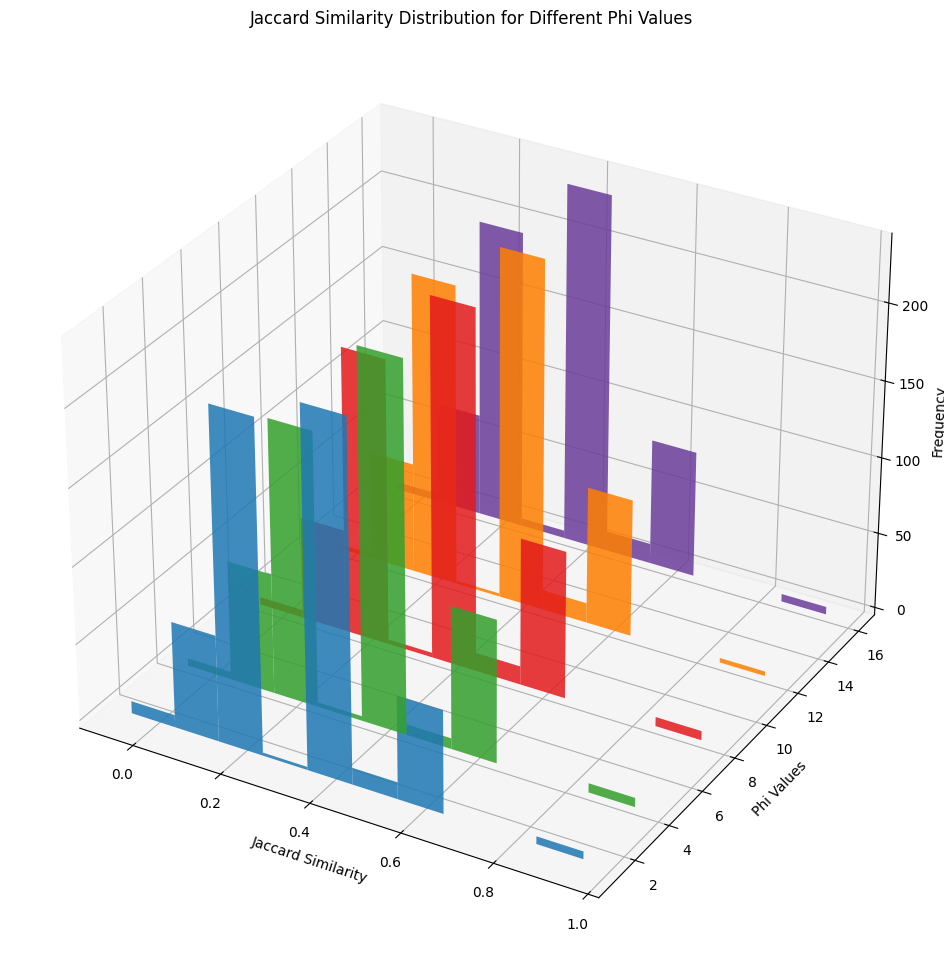

In [72]:
phi_jaccard_experiment()